### 1) Load required libraries and define required functions

In [1]:
import time
from datetime import timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas            as  pd
import numpy             as  np
import seaborn           as  sns
import matplotlib.pyplot as  plt
import statsmodels.api   as  sm
import sys, os

print("\nCurrent working directory %s" %os.getcwd())

os.chdir(r'D:\DrPKV\20220901')


Current working directory D:\DrPKV\20220901


In [4]:
import  matplotlib.pyplot              as       plt
### -------------------------------------------------------------------------
from    sklearn.tree                   import   DecisionTreeClassifier
from    sklearn.ensemble               import   RandomForestClassifier
from    xgboost                        import   XGBClassifier
### -------------------------------------------------------------------------
from    sklearn.metrics          import  accuracy_score, roc_auc_score
from    scipy.stats              import  mode


In [5]:
"""    
1)   Function name: draw_cm
    
     Description: This function does the following:
         
                  Plots a heat graph for confusion matrix 
     Input:
            1) Data Frame containing actual values
     
            2) Data frame containing predicted values
    
    
     Output:
            1) a nice confusion matrix graph      

"""

def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as      plt
    import sklearn.metrics   as      metrics
    import seaborn           as      sns
    from   sklearn.metrics   import  classification_report
    
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Solvant", "NPA"] , yticklabels = ["Solvant", "NPA"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    measures_     = classification_report(actual, predicted) 
    print(measures_) 

### -----------------------------------------------------------------------------------------------------------------------------    

In [6]:
"""
2)   Function name: draw_roc
    
     Description: This function does the following:
                  i) plots a ROC and reports the area under ROC for the specified input
     Input:
          1) Data Frame containing actual values for the target variable
    
          2) Data frame containing predicted probabilities
    
    
     Output:
          1) a nice ROC graph with AUROC mentioned     

"""

def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

### -----------------------------------------------------------------------------------------------------------------------------    

In [7]:
### ----------------------------------------    
def draw_barplot(data, title, target):
### ----------------------------------------    
    plt.figure(figsize = (10, 6))
    DF          =  data[target]
    latedelrisk =  DF.value_counts()
    values      = latedelrisk.keys().tolist()
    counts      = latedelrisk.tolist()
    ax          =  sns.barplot(x = values, y =  counts, data = data)
    titlex      =  '\n' + title + '\n'
    plt.title(titlex)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(target, fontsize=12)
    # now simply assign the bar values to
    # each bar by passing containers method
    # to bar_label function
    ax.bar_label(container = ax.containers[0], padding = 3)
    plt.show()

In [8]:
start_time = time.time()

### 2) Read data files

In [9]:
file_df_train_name   =   r'D:\DrPKV\20220901\Output_20220901041029PM\train_20220901041032PM.csv'
df_train             =   pd.read_csv(file_df_train_name)
print("df Training dataset dimension {}".format(df_train.shape))
print(df_train.columns)

df Training dataset dimension (6300, 16)
Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Operating Cash Flow/Total Debt',
       'Receivable_turnover(new)', 'ROS(new)', 'Total shareholders' funds',
       'Slno', 'Shareholderquity_code', 'Target', 'y_train_pred_CART',
       'y_train_pred_RF', 'y_train_pred_XGB', 'y_train_pred_Consensus'],
      dtype='object')


In [13]:
cols_X_train     =     ['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income', 'Interest_coverage',\
                        'Operating Cash Flow/Total Debt', 'Receivable_turnover(new)', 'ROS(new)',\
                        "Total shareholders' funds"]
df_X_train       =     df_train.loc[:, cols_X_train]

In [15]:
cols_y_train     =    [ 'Target', 'y_train_pred_CART', 'y_train_pred_RF', 'y_train_pred_XGB', 'y_train_pred_Consensus']
df_y_train       =    df_train.loc[:, cols_y_train]

In [16]:
file_df_test_name    =   r'D:\DrPKV\20220901\Output_20220901041029PM\test_20220901041034PM.csv'
df_test              =   pd.read_csv(file_df_test_name)
print("df Test dataset dimension {}".format(df_test.shape))
print(df_test.columns)

df Test dataset dimension (2700, 16)
Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Operating Cash Flow/Total Debt',
       'Receivable_turnover(new)', 'ROS(new)', 'Total shareholders' funds',
       'Slno', 'Shareholderquity_code', 'Target', 'y_test_pred_CART',
       'y_test_pred_RF', 'y_test_pred_XGB', 'y_test_pred_Consensus'],
      dtype='object')


In [17]:
cols_X_test     =    ['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income', 'Interest_coverage',\
                        'Operating Cash Flow/Total Debt', 'Receivable_turnover(new)', 'ROS(new)',\
                        "Total shareholders' funds"]
df_X_test       =     df_test.loc[:, cols_X_test]   

In [19]:
cols_y_test     =    [ 'Target', 'y_test_pred_CART','y_test_pred_RF', 'y_test_pred_XGB', 'y_test_pred_Consensus']
df_y_test       =     df_test.loc[:, cols_y_test] 

file_df_y_train_name   =  r'D:\DrPKV\20220714\Data\df_y_train_predicted_2022_07_14_11_29_41.csv'
df_y_train             =   pd.read_csv(file_df_y_train_name)
print("df Y Training dataset dimension {}".format(df_y_train.shape))
print(df_y_train.columns)

file_df_y_test_name   =  r'D:\DrPKV\20220714\Data\df_y_test_predicted_2022_07_14_11_29_41.csv' 
df_y_test             =  pd.read_csv(file_df_y_test_name)
print("df y Test dataset dimension {}".format(df_y_test.shape))
print(df_y_test.columns)

### Train & Test data

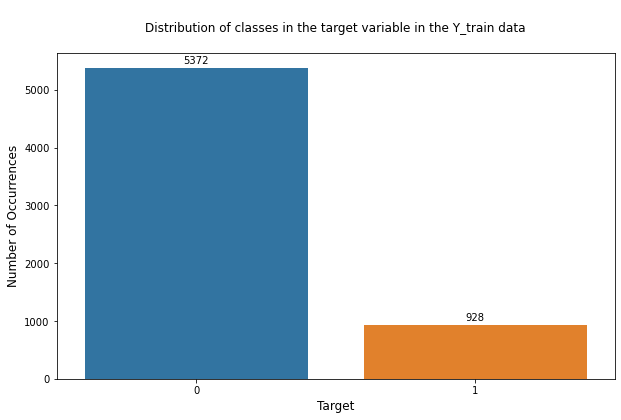

In [20]:
### Barplot for y train data
titlex      =     'Distribution of classes in the target variable in the Y_train data'
draw_barplot(data = df_y_train, title = titlex, target= 'Target')

In [21]:
df_y_train.columns

Index(['Target', 'y_train_pred_CART', 'y_train_pred_RF', 'y_train_pred_XGB',
       'y_train_pred_Consensus'],
      dtype='object')

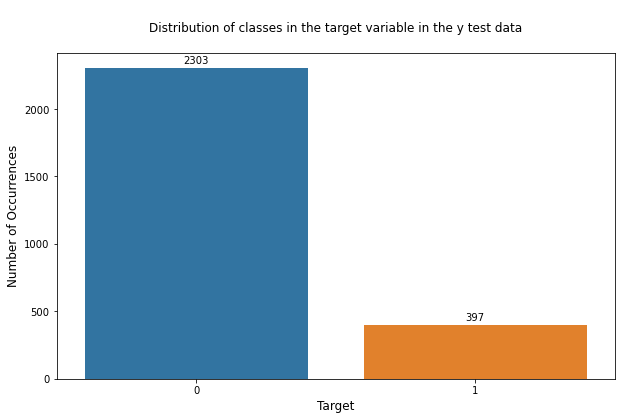

In [22]:
### Barplot for y test data
titlex      =     'Distribution of classes in the target variable in the y test data'
draw_barplot(data = df_y_test, title = titlex, target = 'Target')

### Performance measures 

### CART


Training data




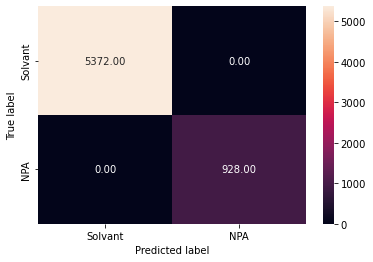

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00       928

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



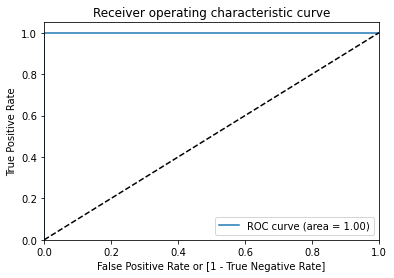

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [25]:
actual    =   df_y_train['Target']
predicted =   df_y_train['y_train_pred_CART']
print("\nTraining data PERFORMANCE MEASURES\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)


Test data




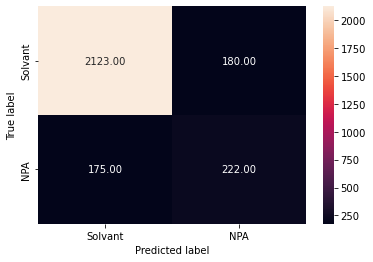

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2303
           1       0.55      0.56      0.56       397

    accuracy                           0.87      2700
   macro avg       0.74      0.74      0.74      2700
weighted avg       0.87      0.87      0.87      2700



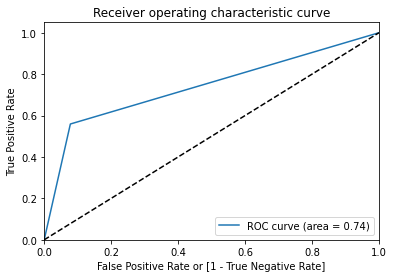

(array([0.        , 0.07815892, 1.        ]),
 array([0.        , 0.55919395, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [26]:
actual    =  df_y_test['Target']
predicted =  df_y_test['y_test_pred_CART']
print("\nTest data PERFORMANCE MEASURES \n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

### Random Forest


Training data for RANDOM FOREST




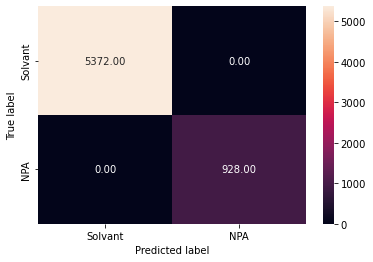

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00       928

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



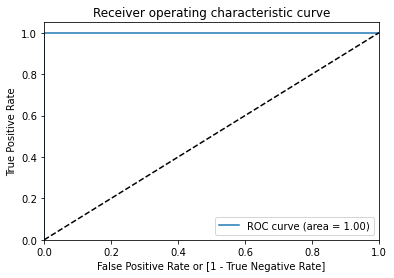

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [31]:
actual    =  df_y_train['Target']
predicted =  df_y_train['y_train_pred_RF']
print("\nTraining data for RANDOM FOREST\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)


Test data for RANDOM FOREST




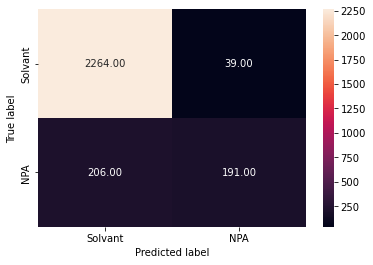

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2303
           1       0.83      0.48      0.61       397

    accuracy                           0.91      2700
   macro avg       0.87      0.73      0.78      2700
weighted avg       0.90      0.91      0.90      2700



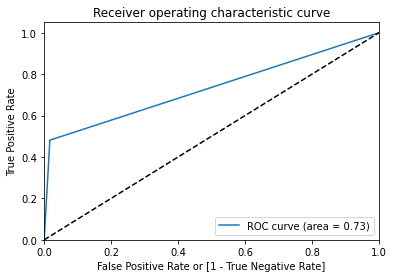

(array([0.        , 0.01693443, 1.        ]),
 array([0.        , 0.48110831, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [32]:
actual    =  df_y_test['Target']
predicted =  df_y_test['y_test_pred_RF']
print("\nTest data for RANDOM FOREST\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

### XGBoost


Training data for XGBOOST




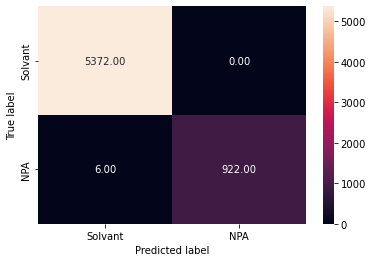

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      0.99      1.00       928

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



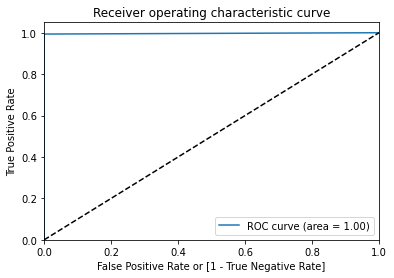

(array([0., 0., 1.]),
 array([0.        , 0.99353448, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [33]:
actual    =  df_y_train['Target']
predicted =  df_y_train['y_train_pred_XGB']
print("\nTraining data for XGBOOST\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)


Test data for XGBOOST




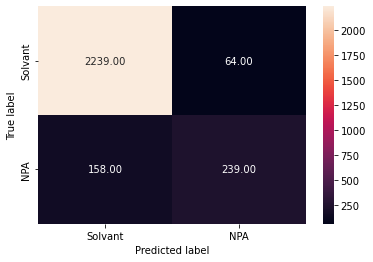

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2303
           1       0.79      0.60      0.68       397

    accuracy                           0.92      2700
   macro avg       0.86      0.79      0.82      2700
weighted avg       0.91      0.92      0.91      2700



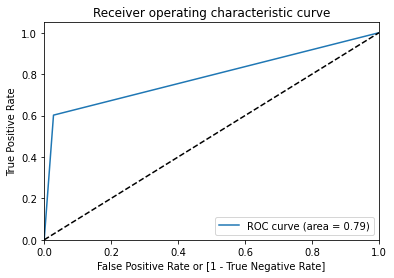

(array([0.        , 0.02778984, 1.        ]),
 array([0.        , 0.60201511, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [35]:
actual    =  df_y_test['Target']
predicted =  df_y_test['y_test_pred_XGB']
print("\nTest data for XGBOOST\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

###  Consensus model 

In [41]:
df_y_train.isnull().sum()

Target                       0
y_train_pred_CART            0
y_train_pred_RF              0
y_train_pred_XGB             0
y_train_pred_Consensus    1855
dtype: int64

actual    =  df_y_train['Target']
predicted =  df_y_train['y_train_pred_Consensus']
print("\nTain data for Consensus model\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

In [42]:
df_y_test.isnull().sum()

Target                      0
y_test_pred_CART            0
y_test_pred_RF              0
y_test_pred_XGB             0
y_test_pred_Consensus    1910
dtype: int64

actual    =  df_y_test['Target']
predicted =  df_y_test['y_test_pred_Consensus']
print("\nTest data for Consensus model\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

### END